**LOADING REQUIRED LIBRARIES**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


In [2]:
# Download stopwords
nltk.download("stopwords")
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load dataset
df = pd.read_csv("amazon_alexa.tsv", sep="\t")  # Ensure the file path is correct

In [4]:
# Drop missing or empty reviews
df = df.dropna(subset=['verified_reviews'])
df = df[df['verified_reviews'].str.strip() != '']

In [5]:
# Convert Ratings into Sentiment Categories
df['feedback'] = df['rating'].map({
    1: 'Negative', 2: 'Negative', 
    3: 'Neutral', 
    4: 'Positive', 5: 'Positive'
})

In [6]:
# Function to clean text
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)  # Remove special characters and numbers
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stopwords.words("english")]
    return " ".join(words)


In [7]:
# Apply preprocessing to reviews
df["cleaned_reviews"] = df["verified_reviews"].apply(preprocess_text)

In [8]:
# Display class distribution
print("Sentiment Distribution:\n", df['feedback'].value_counts())

Sentiment Distribution:
 feedback
Positive    2693
Negative     237
Neutral      140
Name: count, dtype: int64


Text(0.5, 1.0, 'Sentiment Distribution')

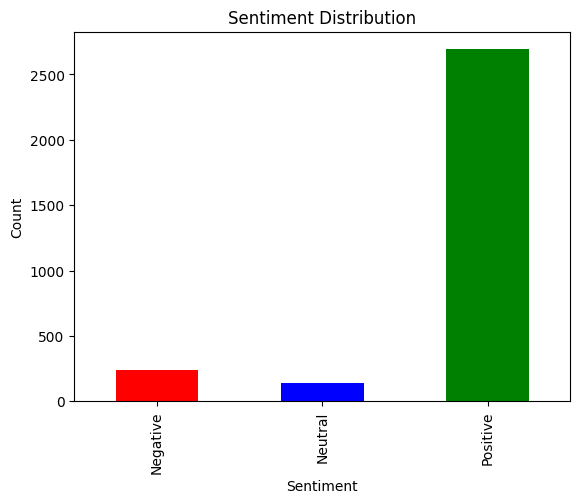

In [9]:
# Plot sentiment distribution
ax = df['feedback'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")

In [10]:
# Annotate bars with count values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

In [11]:
# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["cleaned_reviews"])
y = df["feedback"]

In [12]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Apply SMOTE for balancing classes
smote = SMOTE(sampling_strategy="auto", random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

**NAIVE BAYES MODEL**

In [14]:
# Train Naïve Bayes Model
model = MultinomialNB()
model.fit(x_train_resampled, y_train_resampled)

MultinomialNB()

In [15]:
# Predict on test data
y_pred = model.predict(x_test)

In [28]:

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
print(f"✔ Accuracy: {accuracy:.2f}%")  # Print with 2 decimal places

print("\nClassification Report:\n", classification_report(y_test, y_pred))

✔ Accuracy: 84.69%

Classification Report:
               precision    recall  f1-score   support

    Negative       0.49      0.72      0.58        47
     Neutral       0.31      0.75      0.44        28
    Positive       0.98      0.86      0.92       539

    accuracy                           0.85       614
   macro avg       0.59      0.78      0.64       614
weighted avg       0.91      0.85      0.87       614



**LOGISTIC REGRESSION**

In [18]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train_resampled, y_train_resampled)
y_pred_lr = model_lr.predict(x_test)


In [29]:
# Evaluation
print("🔹 Model: Logistic Regression")
accuracy = accuracy_score(y_test, y_pred_lr) * 100  # Convert to percentage
print(f"✔ Accuracy: {accuracy:.2f}%")  # Print with 2 decimal places
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_lr))


🔹 Model: Logistic Regression
✔ Accuracy: 91.37%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.56      0.74      0.64        47
     Neutral       0.64      0.75      0.69        28
    Positive       0.97      0.94      0.96       539

    accuracy                           0.91       614
   macro avg       0.72      0.81      0.76       614
weighted avg       0.93      0.91      0.92       614



**RANDOM FOREST CLASSIFIER**

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train_resampled, y_train_resampled)
y_pred_rf = model_rf.predict(x_test)

In [30]:
# Evaluation
print("🔹 Model: Random Forest Classifier")
accuracy = accuracy_score(y_test, y_pred_rf) * 100  # Convert to percentage
print(f"✔ Accuracy: {accuracy:.2f}%")  # Print with 2 decimal places
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Model: Random Forest Classifier
✔ Accuracy: 93.81%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.49      0.61        47
     Neutral       0.90      0.68      0.78        28
    Positive       0.95      0.99      0.97       539

    accuracy                           0.94       614
   macro avg       0.89      0.72      0.79       614
weighted avg       0.93      0.94      0.93       614



**SUPPORT VECTOR MACHINE**

In [22]:
from sklearn.svm import SVC

model_svm = SVC(kernel="linear")
model_svm.fit(x_train_resampled, y_train_resampled)
y_pred_svm = model_svm.predict(x_test)

In [31]:
# Evaluation
print("🔹 Model: Support Vector Machine (SVM)")
accuracy = accuracy_score(y_test, y_pred_svm) * 100  # Convert to percentage
print(f"✔ Accuracy: {accuracy:.2f}%")  # Print with 2 decimal places
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_svm))

🔹 Model: Support Vector Machine (SVM)
✔ Accuracy: 91.86%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.60      0.64      0.62        47
     Neutral       0.68      0.68      0.68        28
    Positive       0.96      0.96      0.96       539

    accuracy                           0.92       614
   macro avg       0.75      0.76      0.75       614
weighted avg       0.92      0.92      0.92       614



**Gradient Boosting Classifier**

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100)
model_gb.fit(x_train_resampled, y_train_resampled)
y_pred_gb = model_gb.predict(x_test)

In [32]:
# Evaluation
print("🔹 Model: Gradient Boosting Classifier")
accuracy = accuracy_score(y_test, y_pred_gb) * 100  # Convert to percentage
print(f"✔ Accuracy: {accuracy:.2f}%")  # Print with 2 decimal places
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_gb))


🔹 Model: Gradient Boosting Classifier
✔ Accuracy: 88.60%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.58      0.47      0.52        47
     Neutral       0.39      0.57      0.46        28
    Positive       0.95      0.94      0.94       539

    accuracy                           0.89       614
   macro avg       0.64      0.66      0.64       614
weighted avg       0.89      0.89      0.89       614



**K-Nearest Neighbors (KNN)**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train_resampled, y_train_resampled)
y_pred_knn = model_knn.predict(x_test)

In [33]:
# Evaluation
print("🔹 Model: K-Nearest Neighbors (KNN)")
accuracy = accuracy_score(y_test, y_pred_knn) * 100  # Convert to percentage
print(f"✔ Accuracy: {accuracy:.2f}%")  # Print with 2 decimal places
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_knn))


🔹 Model: K-Nearest Neighbors (KNN)
✔ Accuracy: 89.25%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.52      0.32      0.39        47
     Neutral       0.59      0.68      0.63        28
    Positive       0.93      0.95      0.94       539

    accuracy                           0.89       614
   macro avg       0.68      0.65      0.66       614
weighted avg       0.88      0.89      0.89       614



**Decision Tree Classifier**

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10)
model_dt.fit(x_train_resampled, y_train_resampled)

# Predictions
y_pred_dt = model_dt.predict(x_test)

In [35]:
# Evaluation
print("🔹 Model: Decision Tree")
accuracy = accuracy_score(y_test, y_pred_dt) * 100
print(f"✔ Accuracy: {accuracy:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\n🗂 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


🔹 Model: Decision Tree
✔ Accuracy: 83.88%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.26      0.26      0.26        47
     Neutral       0.33      0.46      0.38        28
    Positive       0.93      0.91      0.92       539

    accuracy                           0.84       614
   macro avg       0.50      0.54      0.52       614
weighted avg       0.85      0.84      0.84       614


🗂 Confusion Matrix:
 [[ 12   8  27]
 [  4  13  11]
 [ 30  19 490]]


**EXTRA TREES CLASSIFIER**

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

# Train model
model_et = ExtraTreesClassifier(n_estimators=100, random_state=42)
model_et.fit(x_train_resampled, y_train_resampled)

# Predictions
y_pred_et = model_et.predict(x_test)

In [37]:
# Evaluation
print("🔹 Model: Extra Trees Classifier")
accuracy = accuracy_score(y_test, y_pred_et) * 100
print(f"✔ Accuracy: {accuracy:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_et))
print("\n🗂 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_et))


🔹 Model: Extra Trees Classifier
✔ Accuracy: 93.32%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.80      0.51      0.62        47
     Neutral       0.79      0.68      0.73        28
    Positive       0.95      0.98      0.96       539

    accuracy                           0.93       614
   macro avg       0.85      0.72      0.77       614
weighted avg       0.93      0.93      0.93       614


🗂 Confusion Matrix:
 [[ 24   1  22]
 [  1  19   8]
 [  5   4 530]]


**ADABOOST CLASSIFIER**

In [38]:
from sklearn.ensemble import AdaBoostClassifier

# Train model
model_ab = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ab.fit(x_train_resampled, y_train_resampled)

# Predictions
y_pred_ab = model_ab.predict(x_test)

In [39]:

# Evaluation
print("🔹 Model: AdaBoost Classifier")
accuracy = accuracy_score(y_test, y_pred_ab) * 100
print(f"✔ Accuracy: {accuracy:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_ab))
print("\n🗂 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ab))


🔹 Model: AdaBoost Classifier
✔ Accuracy: 83.06%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.33      0.28      0.30        47
     Neutral       0.20      0.36      0.26        28
    Positive       0.93      0.90      0.92       539

    accuracy                           0.83       614
   macro avg       0.48      0.51      0.49       614
weighted avg       0.85      0.83      0.84       614


🗂 Confusion Matrix:
 [[ 13   9  25]
 [  6  10  12]
 [ 21  31 487]]


**XGBOOST CLASSIFIER**

In [42]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode string labels to numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)  # Fit on train data
y_test_encoded = label_encoder.transform(y_test)  # Transform test data

# Train XGBoost model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(x_train_resampled, y_train_encoded)

# Predictions
y_pred_xgb = model_xgb.predict(x_test)

# Decode predictions back to original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb)

# Evaluation
print("🔹 Model: XGBoost Classifier")
accuracy = accuracy_score(y_test, y_pred_xgb) * 100
print(f"✔ Accuracy: {accuracy:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n🗂 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


c:\Projects\Opinion_mining_Amazon_Reviews\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:48:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 Model: XGBoost Classifier
✔ Accuracy: 91.53%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.63      0.47      0.54        47
     Neutral       0.69      0.64      0.67        28
    Positive       0.94      0.97      0.96       539

    accuracy                           0.92       614
   macro avg       0.75      0.69      0.72       614
weighted avg       0.91      0.92      0.91       614


🗂 Confusion Matrix:
 [[ 22   2  23]
 [  2  18   8]
 [ 11   6 522]]


**Multi-Layer Perceptron (MLP - ANN)**

In [43]:
from sklearn.neural_network import MLPClassifier

# Train model
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model_mlp.fit(x_train_resampled, y_train_resampled)

# Predictions
y_pred_mlp = model_mlp.predict(x_test)

# Evaluation
print("🔹 Model: Multi-Layer Perceptron (MLP - ANN)")
accuracy = accuracy_score(y_test, y_pred_mlp) * 100
print(f"✔ Accuracy: {accuracy:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("\n🗂 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


🔹 Model: Multi-Layer Perceptron (MLP - ANN)
✔ Accuracy: 92.35%

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.66      0.62      0.64        47
     Neutral       0.65      0.71      0.68        28
    Positive       0.96      0.96      0.96       539

    accuracy                           0.92       614
   macro avg       0.76      0.76      0.76       614
weighted avg       0.92      0.92      0.92       614


🗂 Confusion Matrix:
 [[ 29   3  15]
 [  2  20   6]
 [ 13   8 518]]


In [48]:
import joblib
import os

# Create 'models' directory if not exists
os.makedirs("models", exist_ok=True)

# Save TF-IDF Vectorizer
joblib.dump(vectorizer, "models/tfidf_vectorizer.pkl")

# Save all models
models = {
    "Naive_Bayes": model,
    "Logistic_Regression": model_lr,
    "Random_Forest": model_rf,
    "SVM": model_svm,
    "Gradient_Boosting": model_gb,
    "KNN": model_knn,
    "Decision_Tree": model_dt,
    "Extra_Trees": model_et,
    "AdaBoost": model_ab,
    "XGBoost": model_xgb,
    "MLP_Classifier": model_mlp  # Newly added MLP model
}

for name, model in models.items():
    joblib.dump(model, f"models/{name}.pkl")

print("✅ All models (including MLP) and vectorizer saved successfully!")


✅ All models (including MLP) and vectorizer saved successfully!


In [49]:
from zipfile import ZipFile
import shutil

# Compress the models into a ZIP file
zip_filename = "saved_models.zip"
with ZipFile(zip_filename, "w") as zipf:
    for model_name in os.listdir("models"):
        zipf.write(os.path.join("models", model_name), model_name)

# Move ZIP file to root directory for easy download
shutil.move(zip_filename, f"./{zip_filename}")

print(f"✅ Models saved and zipped as {zip_filename}")


✅ Models saved and zipped as saved_models.zip


In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import os

# Load Dataset
df = pd.read_csv("amazon_alexa.tsv", sep="\t")

# Handle Missing Values (Remove rows with NaN in "verified_reviews")
df = df.dropna(subset=["verified_reviews"])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words="english")
vectorizer.fit(df["verified_reviews"])  # Train on all reviews

# Ensure the "models" directory exists
os.makedirs("models", exist_ok=True)

# Save vectorizer
joblib.dump(vectorizer, "models/tfidf_vectorizer.pkl")

print("TF-IDF vectorizer trained and saved successfully!")


TF-IDF vectorizer trained and saved successfully!
